# Section 1: Imports and Setup

In [38]:
# Section 1: Imports and Setup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
import yfinance as yf
from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

# Plot style
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")

# Configuration
start_date = "2025-01-01"
end_date = "2025-07-11"

# Section 2: Universe Selection and Data Download

Here we will download the Stocks, we will classify the stocks based on Large, Mid and Small Cap

In [39]:
it_stocks = [
    # Large / Mega‑caps (Nifty IT)
    'TCS.NS', 'INFY.NS', 'HCLTECH.NS', 'WIPRO.NS', 'TECHM.NS',
    'LTIMINDTREE.NS', 'PERSISTENT.NS', 'COFORGE.NS',
    'MPHASIS.NS', 'OFSS.NS', 'ORACLEFN.NS', 'TATAELXSI.NS',
    'CYIENT.NS', 'KPITTECH.NS', 'NIITTECH.NS', 'ZENSAR.NS',
    'HEXAWARE.NS', 'BIRLASOFT.NS', 'SONATSOFTW.NS',

    # Additional Mid-caps
    'ECLERX.NS', 'INTELLECT.NS', 'NEWGEN.NS', 'AFFLE3I.NS',
    'ITCINFOTECH.NS', 'DATAMATICS.NS', 'CIGNITI.NS',
    'AXISCADES.NS', 'R_SYSTEMS.NS', 'ROUTEMOBIL.NS',
    'EMUDHRA.NS', 'HAPPMINDS.NS', 'MASTEK.NS', 'QUESSCORP.NS',
    'AZINDUST.NS', 'MAGELLANIC.NS', 'NAZARA.NS',

    # Small-caps & Emerging IT names
    '3IINFOTECH.NS', 'ALCHEMINT.NS', 'APPSOCIETY.NS',
    'ARROWGREEN.NS', 'BEXIND.NS', 'BRNIND.NS', 'CIPHER.NS',
    'CITIZENINF.NS', 'COMPUAGE.NS', 'CORALFINAC.NS',
    'CSSP.NS', 'DATAJET.NS', 'DEVINFOY.NS', 'DIGITAL.NS',
    'ELECON.NS', 'EXCELINFO.NS', 'GLOBTECH.NS', 'HCLINFOSYS.NS',
    'IDEAENG.NS', 'IGARASHI.NS', 'IMPPO.NS', 'INTLCROWN.NS',
    'IRISNFC.NS', 'LANCOIN.NS', 'LITMUS.NS', 'MATRIXCOM.NS',
    'MODINFONIK.NS', 'NIRAJFIN.NS', 'NRBHOUSING.NS', 'NVENEXT.NS',
    'OPTOCIRC.NS', 'PANACHE.NS', 'PANORAMIC.NS', 'PENTAMED.NS',
    'PRIMEURJA.NS', 'PRISMMEDIA.NS', 'PUNJABFIN.NS', 'RADIANT.NS',
    'RHIINFRA.NS', 'RLNVN.NS', 'SARLAPOLY.NS', 'SPLT.NS',
    'SRVINFRA.NS', 'SVCL.NS', 'TANLA.NS', 'TEJASNET.NS',
    'TRIL.NS', 'UNOMINDA.NS', 'VISTASPACE.NS', 'VTLS.NS',
    'WEIZITECH.NS', 'WINCENT.NS', 'WIPROINFRA.NS'
]

In [40]:
df_prices = yf.download(it_stocks, start=start_date, end=end_date)['Close']
df_prices.dropna(axis=1, how="all", inplace=True)
print(f"Data Shape: {df_prices.shape}")

[*********************100%***********************]  88 of 89 completed

59 Failed downloads:
['INTLCROWN.NS', 'MAGELLANIC.NS', 'TRIL.NS', 'HCLINFOSYS.NS', 'IRISNFC.NS', 'NRBHOUSING.NS', 'LTIMINDTREE.NS', 'RLNVN.NS', 'ROUTEMOBIL.NS', 'WEIZITECH.NS', 'OPTOCIRC.NS', 'HEXAWARE.NS', 'COMPUAGE.NS', 'VISTASPACE.NS', 'CITIZENINF.NS', 'AFFLE3I.NS', 'GLOBTECH.NS', 'NVENEXT.NS', 'NIITTECH.NS', 'ALCHEMINT.NS', 'BIRLASOFT.NS', 'PANORAMIC.NS', 'RADIANT.NS', 'QUESSCORP.NS', 'DATAJET.NS', 'ORACLEFN.NS', 'PRIMEURJA.NS', 'SPLT.NS', 'CIPHER.NS', 'VTLS.NS', 'BRNIND.NS', 'SVCL.NS', 'CSSP.NS', 'AZINDUST.NS', 'APPSOCIETY.NS', 'LITMUS.NS', 'PUNJABFIN.NS', 'IMPPO.NS', 'WIPROINFRA.NS', 'RHIINFRA.NS', 'ITCINFOTECH.NS', 'SRVINFRA.NS', 'HAPPMINDS.NS', 'ZENSAR.NS', '3IINFOTECH.NS', 'PENTAMED.NS', 'NIRAJFIN.NS', 'IDEAENG.NS', 'WINCENT.NS', 'PRISMMEDIA.NS', 'R_SYSTEMS.NS', 'MATRIXCOM.NS', 'BEXIND.NS', 'DEVINFOY.NS', 'DIGITAL.NS', 'MODINFONIK.NS']: YFTzMissingError('possibly delisted; no timezone found')
['CIGNITI.NS'

Data Shape: (131, 30)


# Section 3: Correlation Analysis and Heatmap

Now based on the the stocks that are downloaded, we will make a correlation heatmap and we will choose stocks that have values higher than 0.69.

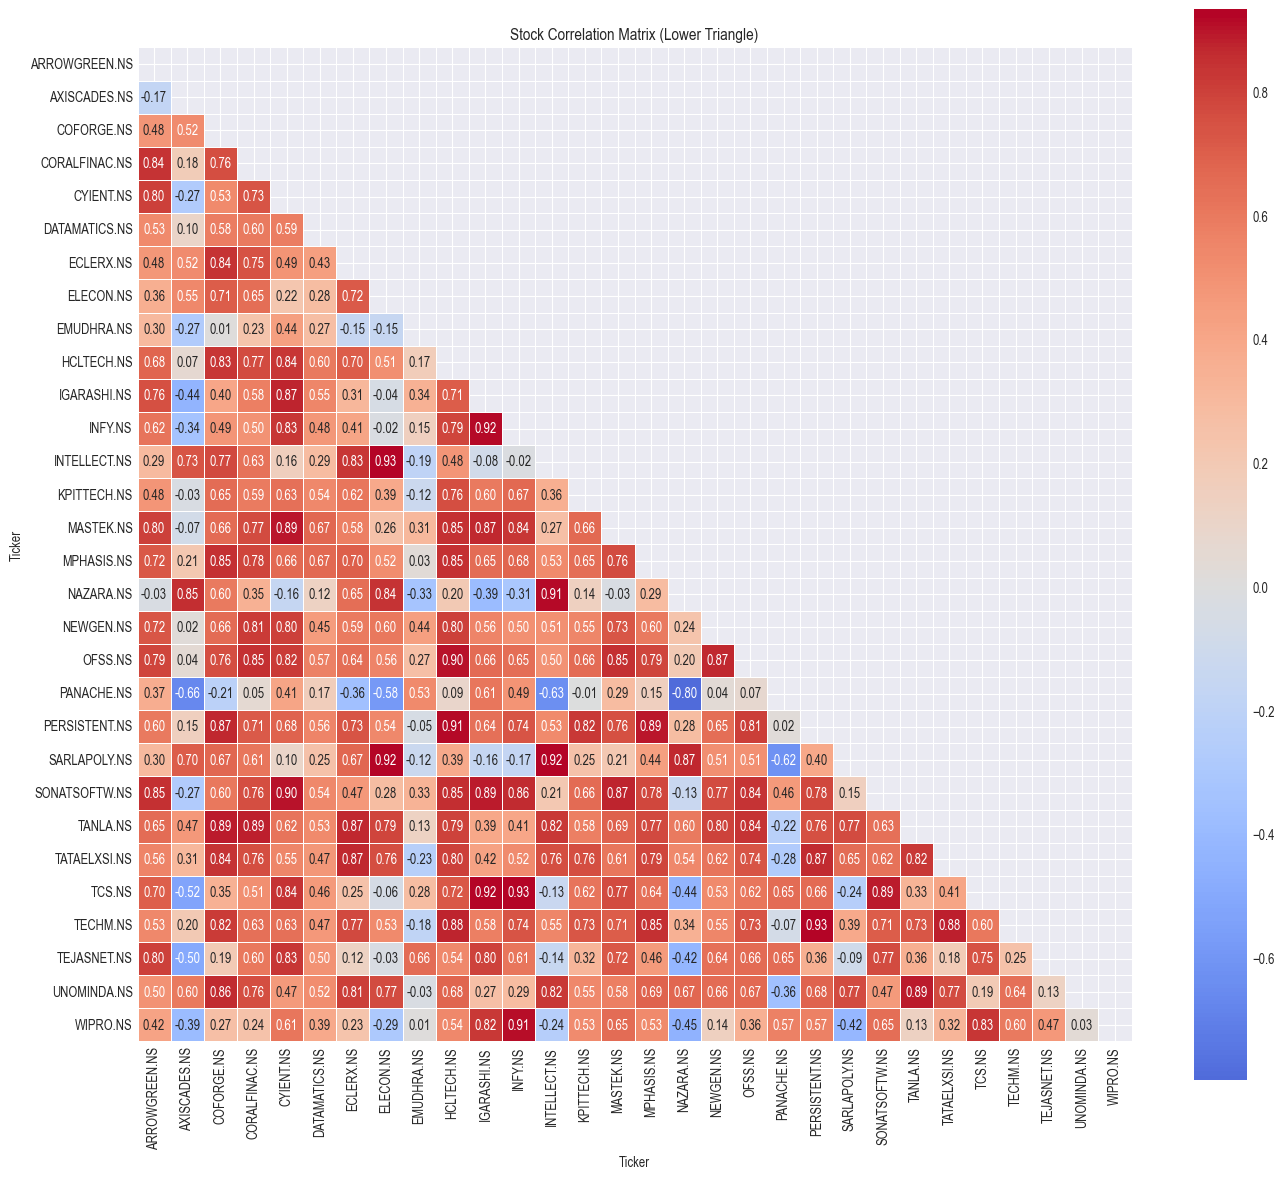

Highly correlated pairs (>0.8): 70
ARROWGREEN.NS - CORALFINAC.NS: 0.845
ARROWGREEN.NS - CYIENT.NS: 0.801
ARROWGREEN.NS - MASTEK.NS: 0.800
ARROWGREEN.NS - SONATSOFTW.NS: 0.849
AXISCADES.NS - NAZARA.NS: 0.853
COFORGE.NS - ECLERX.NS: 0.843
COFORGE.NS - HCLTECH.NS: 0.828
COFORGE.NS - MPHASIS.NS: 0.847
COFORGE.NS - PERSISTENT.NS: 0.869
COFORGE.NS - TANLA.NS: 0.888
COFORGE.NS - TATAELXSI.NS: 0.845
COFORGE.NS - TECHM.NS: 0.818
COFORGE.NS - UNOMINDA.NS: 0.863
CORALFINAC.NS - NEWGEN.NS: 0.815
CORALFINAC.NS - OFSS.NS: 0.851
CORALFINAC.NS - TANLA.NS: 0.885
CYIENT.NS - HCLTECH.NS: 0.836
CYIENT.NS - IGARASHI.NS: 0.874
CYIENT.NS - INFY.NS: 0.831
CYIENT.NS - MASTEK.NS: 0.893
CYIENT.NS - NEWGEN.NS: 0.803
CYIENT.NS - OFSS.NS: 0.816
CYIENT.NS - SONATSOFTW.NS: 0.903
CYIENT.NS - TCS.NS: 0.844
CYIENT.NS - TEJASNET.NS: 0.829
ECLERX.NS - INTELLECT.NS: 0.834
ECLERX.NS - TANLA.NS: 0.867
ECLERX.NS - TATAELXSI.NS: 0.868
ECLERX.NS - UNOMINDA.NS: 0.808
ELECON.NS - INTELLECT.NS: 0.933
ELECON.NS - NAZARA.NS: 0.839
E

In [41]:
# Compute correlation matrix
correlation_matrix = df_prices.corr()
correlation_Paramter = 0.8

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Stock Correlation Matrix (Lower Triangle)')
plt.tight_layout()
plt.show()

# Find highly correlated pairs (>f"{correlation_Paramter}")
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i, j]
        if corr_val > correlation_Paramter:
            high_corr_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], corr_val))

print(f"Highly correlated pairs (>{correlation_Paramter}): {len(high_corr_pairs)}")
for pair in high_corr_pairs:  # Shows all pairs
    print(f"{pair[0]} - {pair[1]}: {pair[2]:.3f}")

# Section 4: Helper Functions for Analysis

In [42]:
# Section 4: Helper Functions for Analysis
def calculate_hedge_ratio(y, x):
    """Calculate hedge ratio using OLS regression"""
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model.params[1]

def calculate_spread(y, x, hedge_ratio):
    """Calculate spread = y - beta * x"""
    return y - hedge_ratio * x

def adf_test(series):
    """Perform ADF test and return statistic and p-value"""
    result = adfuller(series, autolag='AIC')
    return result[0], result[1]

def calculate_half_life(spread):
    """Calculate half-life of mean reversion"""
    try:
        spread_lag = spread.shift(1)
        spread_diff = spread - spread_lag
        spread_lag = spread_lag.dropna()
        spread_diff = spread_diff.dropna()
        
        # Align the series
        aligned_data = pd.concat([spread_diff, spread_lag], axis=1).dropna()
        if len(aligned_data) < 10:
            return np.nan
            
        spread_diff = aligned_data.iloc[:, 0]
        spread_lag = aligned_data.iloc[:, 1]
        
        # Run regression: spread_diff = lambda * spread_lag + error
        x_with_const = sm.add_constant(spread_lag)
        model = sm.OLS(spread_diff, x_with_const).fit()
        lambda_coef = model.params[1]
        
        if lambda_coef >= 0:
            return np.nan
            
        half_life = -np.log(2) / lambda_coef
        return half_life if half_life > 0 else np.nan
    except:
        return np.nan

# Section 5: Pairs Testing Loop

The code systematically evaluates all possible stock pairs from the cleaned price data (df_prices) to identify statistically cointegrated pairs suitable for pairs trading strategies.

For each pair, it computes the following;
1. Hedge ratio using an OLS regression
2. Constructs the spread (y - βx)
3. Tests whether this spread is stationary using the Augmented Dickey-Fuller (ADF) test.

The idea is that if two stock prices move together in the long term, their spread should revert to a mean — a key requirement for statistical arbitrage.

Along with the ADF test, the code also calculates other useful metrics like; 
1. correlation
2. Mean
3. Standard deviation of the spread
4. Half-life of mean reversion (i.e., how quickly the spread reverts to its mean). 

All these metrics are stored in a results DataFrame, and any pair with an ADF p-value less than 0.05 is flagged as a valid cointegrated pair. This section helps filter out potentially profitable pairs from the entire universe for further backtesting and signal generation.

In [43]:
# Test all possible pairs (N choose 2)
stocks = list(df_prices.columns)
all_pairs = list(combinations(stocks, 2))

print(f"Testing {len(all_pairs)} pairs...")

results = []

for i, (stock_a, stock_b) in enumerate(all_pairs):
    if i % 20 == 0:
        print(f"Progress: {i}/{len(all_pairs)}")
    
    try:
        # Get price series
        y = df_prices[stock_a]
        x = df_prices[stock_b]
        
        # Calculate hedge ratio
        hedge_ratio = calculate_hedge_ratio(y, x)
        
        # Calculate spread
        spread = calculate_spread(y, x, hedge_ratio)
        
        # ADF test
        adf_stat, adf_pvalue = adf_test(spread)
        
        # Correlation
        correlation = correlation_matrix.loc[stock_a, stock_b]
        
        # Half-life
        half_life = calculate_half_life(spread)
        
        # Spread statistics
        spread_mean = spread.mean()
        spread_std = spread.std()
        
        # Check validity
        is_valid = adf_pvalue < 0.05
        
        results.append({
            'Stock_A': stock_a,
            'Stock_B': stock_b,
            'Hedge_Ratio': hedge_ratio,
            'ADF_Stat': adf_stat,
            'ADF_PValue': adf_pvalue,
            'Correlation': correlation,
            'Half_Life': half_life,
            'Spread_Mean': spread_mean,
            'Spread_Std': spread_std,
            'Valid': is_valid
        })
        
    except Exception as e:
        print(f"Error processing {stock_a}-{stock_b}: {e}")
        continue

# Create results DataFrame
results_df = pd.DataFrame(results)
print(f"\nCompleted analysis of {len(results_df)} pairs")
print(f"Valid cointegrated pairs: {results_df['Valid'].sum()}")

Testing 435 pairs...
Progress: 0/435
Progress: 20/435
Progress: 40/435
Progress: 60/435
Progress: 80/435
Progress: 100/435
Progress: 120/435
Progress: 140/435
Progress: 160/435
Progress: 180/435
Progress: 200/435
Progress: 220/435
Progress: 240/435
Progress: 260/435
Progress: 280/435
Progress: 300/435
Progress: 320/435
Progress: 340/435
Progress: 360/435
Progress: 380/435
Progress: 400/435
Progress: 420/435

Completed analysis of 435 pairs
Valid cointegrated pairs: 92


# Section 6: Results Analysis and Filtering

In [44]:
# Filter valid pairs and rank them
valid_pairs = results_df[results_df['Valid'] == True].copy()

if len(valid_pairs) > 0:
    # Sort by most negative ADF statistic (strongest cointegration)
    valid_pairs = valid_pairs.sort_values('ADF_Stat', ascending=True)
    
    # Filter by half-life < 30 days (optional)
    valid_pairs = valid_pairs[valid_pairs['Half_Life'] < 30]
    
    print("Top 10 Cointegrated Pairs:")
    print("=" * 80)
    display_cols = ['Stock_A', 'Stock_B', 'ADF_Stat', 'ADF_PValue', 'Correlation', 'Half_Life']
    print(valid_pairs[display_cols].head(10).to_string(index=False))
    
    # Save results to CSV
    valid_pairs.to_csv('cointegrated_pairs_results.csv', index=False)
    results_df.to_csv('all_pairs_results.csv', index=False)
    
else:
    print("No valid cointegrated pairs found!")

# Summary statistics
print(f"\nSummary Statistics:")
print(f"Total pairs tested: {len(results_df)}")
print(f"Valid pairs (p < 0.05): {len(valid_pairs)}")
print(f"Average correlation: {results_df['Correlation'].mean():.3f}")
print(f"Average half-life: {results_df['Half_Life'].mean():.1f} days")

Top 10 Cointegrated Pairs:
      Stock_A       Stock_B  ADF_Stat   ADF_PValue  Correlation  Half_Life
DATAMATICS.NS     MASTEK.NS -5.813601 4.343878e-07     0.672944   2.448045
DATAMATICS.NS SONATSOFTW.NS -5.754839 5.852281e-07     0.538252   2.823095
DATAMATICS.NS    MPHASIS.NS -5.612752 1.193156e-06     0.668064   2.389283
DATAMATICS.NS     NEWGEN.NS -5.598107 1.283170e-06     0.454704   3.033247
DATAMATICS.NS    HCLTECH.NS -5.520669 1.880835e-06     0.595621   2.578119
DATAMATICS.NS       OFSS.NS -5.495039 2.132826e-06     0.568584   2.717169
DATAMATICS.NS      TANLA.NS -5.418911 3.090799e-06     0.529092   2.871104
DATAMATICS.NS   IGARASHI.NS -5.321590 4.939074e-06     0.552858   2.975981
DATAMATICS.NS       INFY.NS -5.321114 4.950330e-06     0.475613   3.058031
DATAMATICS.NS        TCS.NS -5.298774 5.507762e-06     0.462680   3.063590

Summary Statistics:
Total pairs tested: 435
Valid pairs (p < 0.05): 92
Average correlation: 0.467
Average half-life: 26.8 days


# Section 7: Backtesting Framework

In [45]:
def backtest_pair(stock_a, stock_b, hedge_ratio, df_prices, entry_threshold=1.0, exit_threshold=0.05):
    """Backtest a single pair"""
    # Get price series
    y = df_prices[stock_a]
    x = df_prices[stock_b]
    
    # Calculate spread and z-score
    spread = y - hedge_ratio * x
    zscore = (spread - spread.mean()) / spread.std()
    
    # Generate signals
    signals = pd.DataFrame(index=df_prices.index)
    signals['zscore'] = zscore
    signals['position'] = 0
    
    for i in range(1, len(signals)):
        if signals['zscore'].iloc[i] > entry_threshold:
            signals.loc[signals.index[i], 'position'] = -1  # Short spread
        elif signals['zscore'].iloc[i] < -entry_threshold:
            signals.loc[signals.index[i], 'position'] = 1   # Long spread
        elif abs(signals['zscore'].iloc[i]) < exit_threshold:
            signals.loc[signals.index[i], 'position'] = 0   # Exit
        else:
            signals.loc[signals.index[i], 'position'] = signals.loc[signals.index[i-1], 'position']
    
    # Calculate returns
    returns = pd.DataFrame(index=signals.index)
    returns[stock_a] = df_prices[stock_a].pct_change()
    returns[stock_b] = df_prices[stock_b].pct_change()
    returns['strategy_return'] = 0.0
    
    for i in range(1, len(returns)):
        position = signals['position'].iloc[i-1]
        ret_a = returns[stock_a].iloc[i]
        ret_b = returns[stock_b].iloc[i]
        
        if position == 1:  # Long spread
            returns['strategy_return'].iloc[i] = ret_a - hedge_ratio * ret_b
        elif position == -1:  # Short spread
            returns['strategy_return'].iloc[i] = -ret_a + hedge_ratio * ret_b
        else:
            returns['strategy_return'].iloc[i] = 0.0
    
    returns['cumulative'] = (1 + returns['strategy_return']).cumprod()
    
    return signals, returns

In [46]:
def calculate_performance_metrics(returns):
    """Calculate key performance metrics"""
    total_return = returns['cumulative'].iloc[-1] - 1
    annualized_return = (returns['cumulative'].iloc[-1]) ** (252 / len(returns)) - 1
    annualized_vol = returns['strategy_return'].std() * np.sqrt(252)
    sharpe_ratio = annualized_return / annualized_vol if annualized_vol > 0 else 0
    
    # Max drawdown
    cumulative = returns['cumulative']
    running_max = cumulative.expanding().max()
    drawdown = (cumulative - running_max) / running_max
    max_drawdown = drawdown.min()
    
    return {
        'Total_Return': total_return,
        'Annualized_Return': annualized_return,
        'Annualized_Volatility': annualized_vol,
        'Sharpe_Ratio': sharpe_ratio,
        'Max_Drawdown': max_drawdown
    }

# Section 8: Backtest Top Pairs

In [54]:
if len(valid_pairs) > 0:
    # Backtest top 5 pairs
    top_pairs = valid_pairs.head(5)
    backtest_results = []
    
    for idx, row in top_pairs.iterrows():
        stock_a = row['Stock_A']
        stock_b = row['Stock_B']
        hedge_ratio = row['Hedge_Ratio']
        
        print(f"Backtesting {stock_a} - {stock_b}...")
        
        signals, returns = backtest_pair(stock_a, stock_b, hedge_ratio, df_prices)
        metrics = calculate_performance_metrics(returns)
        
        result = {
            'Stock_A': stock_a,
            'Stock_B': stock_b,
            'Hedge_Ratio': hedge_ratio,
            'ADF_Stat': row['ADF_Stat'],
            'Half_Life': row['Half_Life'],
            **metrics
        }
        
        backtest_results.append(result)
    
    # Create backtest results DataFrame
    backtest_df = pd.DataFrame(backtest_results)
    backtest_df = backtest_df.sort_values('Sharpe_Ratio', ascending=False)
    
    print("\nBacktest Results (Top Pairs based on the Sharpe Ratio):")
    print("=" * 100)
    display_cols = ['Stock_A', 'Stock_B', 'Total_Return', 'Annualized_Return', 
                   'Annualized_Volatility', 'Sharpe_Ratio', 'Max_Drawdown']
    print(backtest_df[display_cols].round(4).to_string(index=False))
    
    # Save backtest results
    backtest_df.to_csv('backtest_results.csv', index=False)
    
else:
    print("No valid pairs to backtest!")

Backtesting DATAMATICS.NS - MASTEK.NS...
Backtesting DATAMATICS.NS - SONATSOFTW.NS...
Backtesting DATAMATICS.NS - MPHASIS.NS...
Backtesting DATAMATICS.NS - NEWGEN.NS...
Backtesting DATAMATICS.NS - HCLTECH.NS...

Backtest Results (Top Pairs based on the Sharpe Ratio):
      Stock_A       Stock_B  Total_Return  Annualized_Return  Annualized_Volatility  Sharpe_Ratio  Max_Drawdown
DATAMATICS.NS    HCLTECH.NS        2.8714            12.5164                 0.4227       29.6072       -0.0737
DATAMATICS.NS     NEWGEN.NS        2.5968            10.7326                 0.4168       25.7469       -0.0517
DATAMATICS.NS    MPHASIS.NS        2.6441            11.0314                 0.4561       24.1876       -0.0704
DATAMATICS.NS     MASTEK.NS        2.0633             7.6151                 0.4356       17.4831       -0.0880
DATAMATICS.NS SONATSOFTW.NS        1.2132             3.6100                 0.4448        8.1157       -0.1271


# Section 9: Visualization of Best Pair

Visualizing best pair: DATAMATICS.NS - HCLTECH.NS


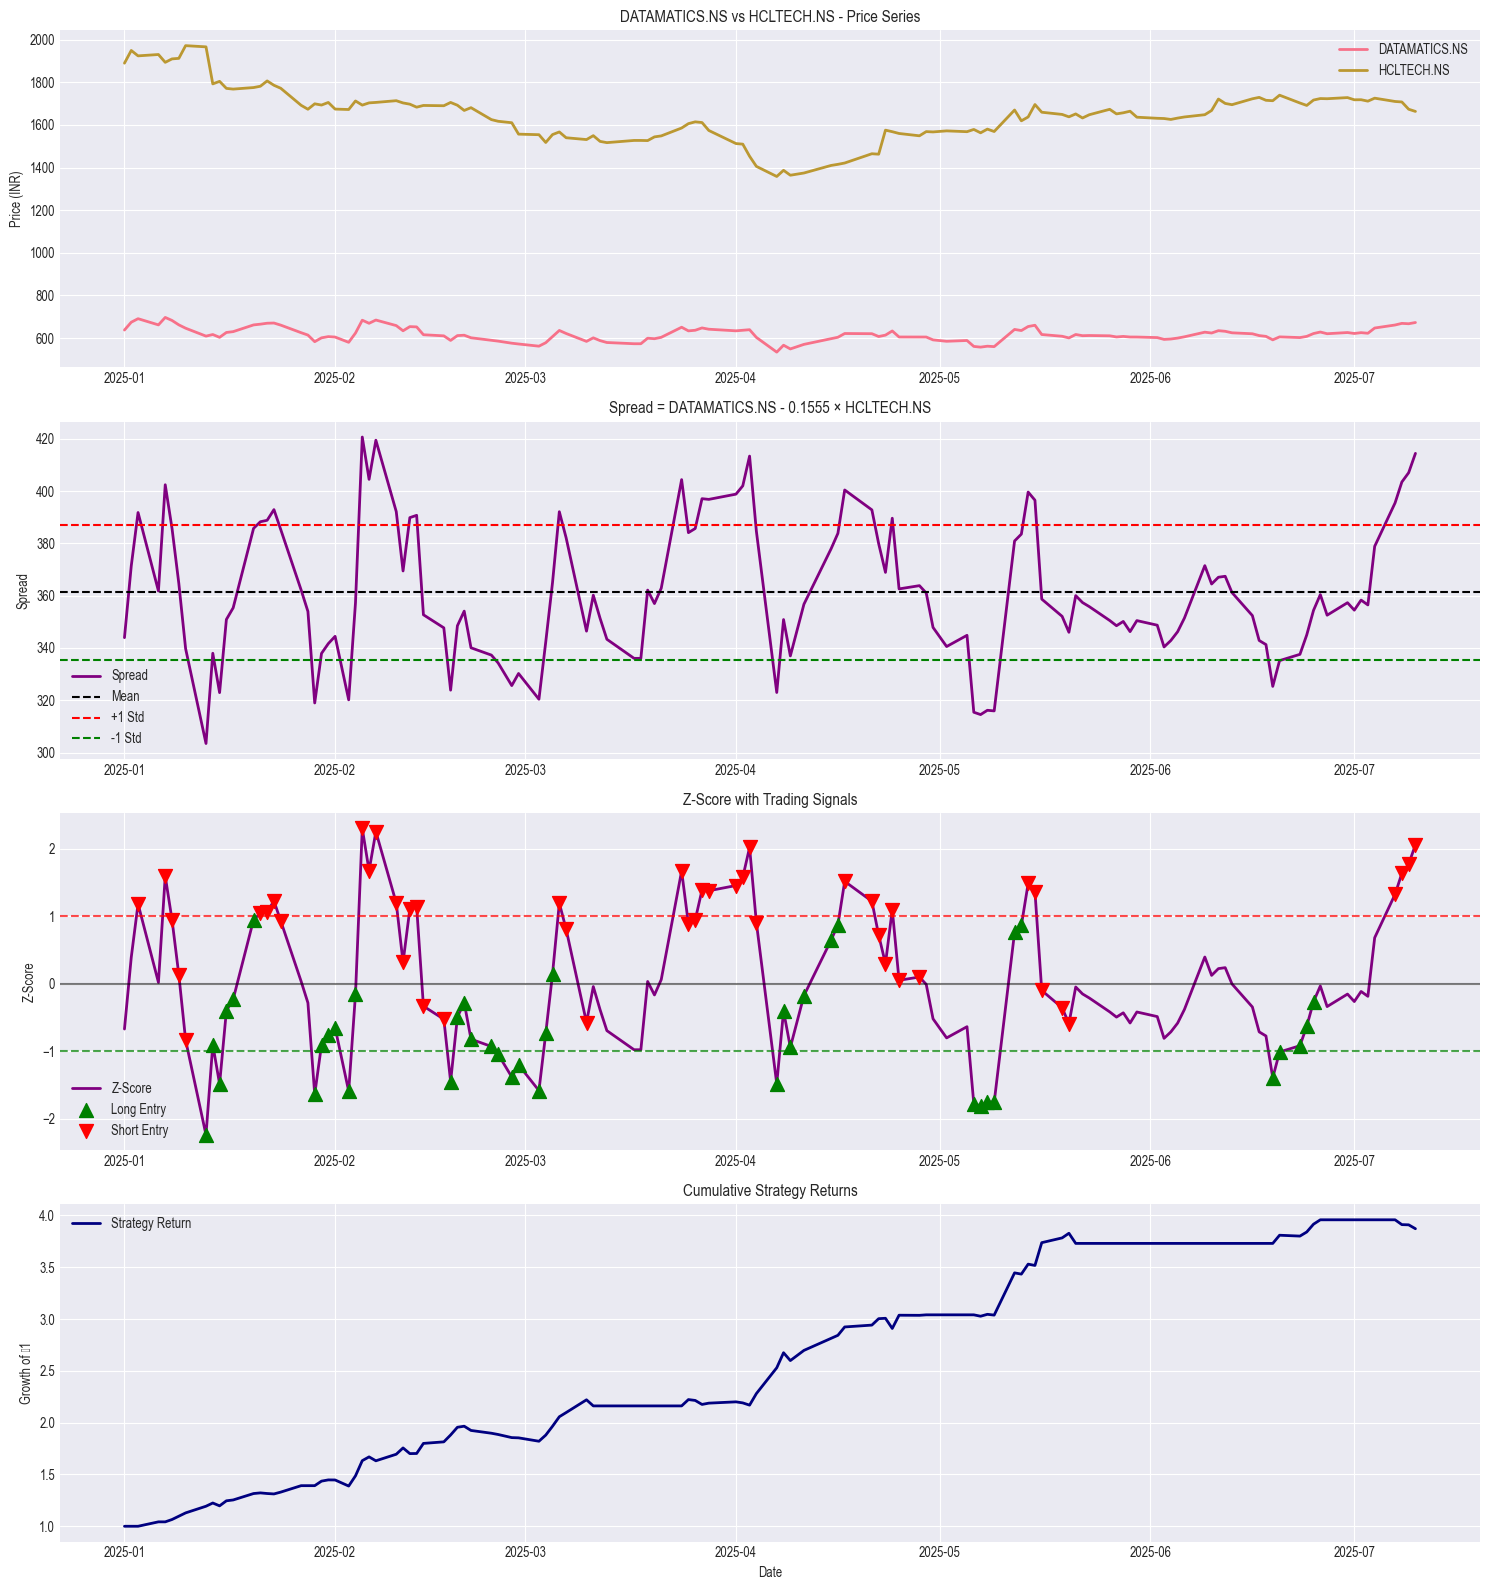


Performance Summary for DATAMATICS.NS - HCLTECH.NS:
Total Return: 287.14%
Annualized Return: 1251.64%
Sharpe Ratio: 29.61
Max Drawdown: -7.37%


In [55]:
if len(valid_pairs) > 0:
    # Get the best performing pair
    best_pair = backtest_df.iloc[0]
    stock_a = best_pair['Stock_A']
    stock_b = best_pair['Stock_B']
    hedge_ratio = best_pair['Hedge_Ratio']
    
    print(f"Visualizing best pair: {stock_a} - {stock_b}")
    
    # Run backtest
    signals, returns = backtest_pair(stock_a, stock_b, hedge_ratio, df_prices)
    
    # Calculate spread and z-score
    y = df_prices[stock_a]
    x = df_prices[stock_b]
    spread = y - hedge_ratio * x
    zscore = (spread - spread.mean()) / spread.std()
    
    # Create visualization
    fig, axes = plt.subplots(4, 1, figsize=(15, 16))
    
    # Plot 1: Price series
    axes[0].plot(df_prices.index, df_prices[stock_a], label=stock_a, linewidth=2)
    axes[0].plot(df_prices.index, df_prices[stock_b], label=stock_b, linewidth=2)
    axes[0].set_title(f'{stock_a} vs {stock_b} - Price Series')
    axes[0].set_ylabel('Price (INR)')
    axes[0].legend()
    axes[0].grid(True)
    
    # Plot 2: Spread
    axes[1].plot(spread.index, spread, label='Spread', color='purple', linewidth=2)
    axes[1].axhline(spread.mean(), color='black', linestyle='--', label='Mean')
    axes[1].axhline(spread.mean() + spread.std(), color='red', linestyle='--', label='+1 Std')
    axes[1].axhline(spread.mean() - spread.std(), color='green', linestyle='--', label='-1 Std')
    axes[1].set_title(f'Spread = {stock_a} - {hedge_ratio:.4f} × {stock_b}')
    axes[1].set_ylabel('Spread')
    axes[1].legend()
    axes[1].grid(True)
    
    # Plot 3: Z-score with signals
    axes[2].plot(zscore.index, zscore, label='Z-Score', color='purple', linewidth=2)
    axes[2].axhline(1.0, color='red', linestyle='--', alpha=0.7)
    axes[2].axhline(-1.0, color='green', linestyle='--', alpha=0.7)
    axes[2].axhline(0.0, color='black', linestyle='-', alpha=0.5)
    
    # Add signal markers
    long_signals = signals[signals['position'] == 1]
    short_signals = signals[signals['position'] == -1]
    exit_signals = signals[signals['position'] == 0]
    
    if len(long_signals) > 0:
        axes[2].scatter(long_signals.index, long_signals['zscore'], 
                       color='green', marker='^', s=100, label='Long Entry', zorder=5)
    if len(short_signals) > 0:
        axes[2].scatter(short_signals.index, short_signals['zscore'], 
                       color='red', marker='v', s=100, label='Short Entry', zorder=5)
    
    axes[2].set_title('Z-Score with Trading Signals')
    axes[2].set_ylabel('Z-Score')
    axes[2].legend()
    axes[2].grid(True)
    
    # Plot 4: Cumulative returns
    axes[3].plot(returns.index, returns['cumulative'], 
                label='Strategy Return', color='navy', linewidth=2)
    axes[3].set_title('Cumulative Strategy Returns')
    axes[3].set_ylabel('Growth of ₹1')
    axes[3].set_xlabel('Date')
    axes[3].legend()
    axes[3].grid(True)
    
    plt.tight_layout()
    plt.show()
    
    # Print performance summary
    print(f"\nPerformance Summary for {stock_a} - {stock_b}:")
    print(f"Total Return: {best_pair['Total_Return']*100:.2f}%")
    print(f"Annualized Return: {best_pair['Annualized_Return']*100:.2f}%")
    print(f"Sharpe Ratio: {best_pair['Sharpe_Ratio']:.2f}")
    print(f"Max Drawdown: {best_pair['Max_Drawdown']*100:.2f}%")

# Section 10: Portfolio of Top Pairs (Optional)

Creating portfolio of top 3 pairs...


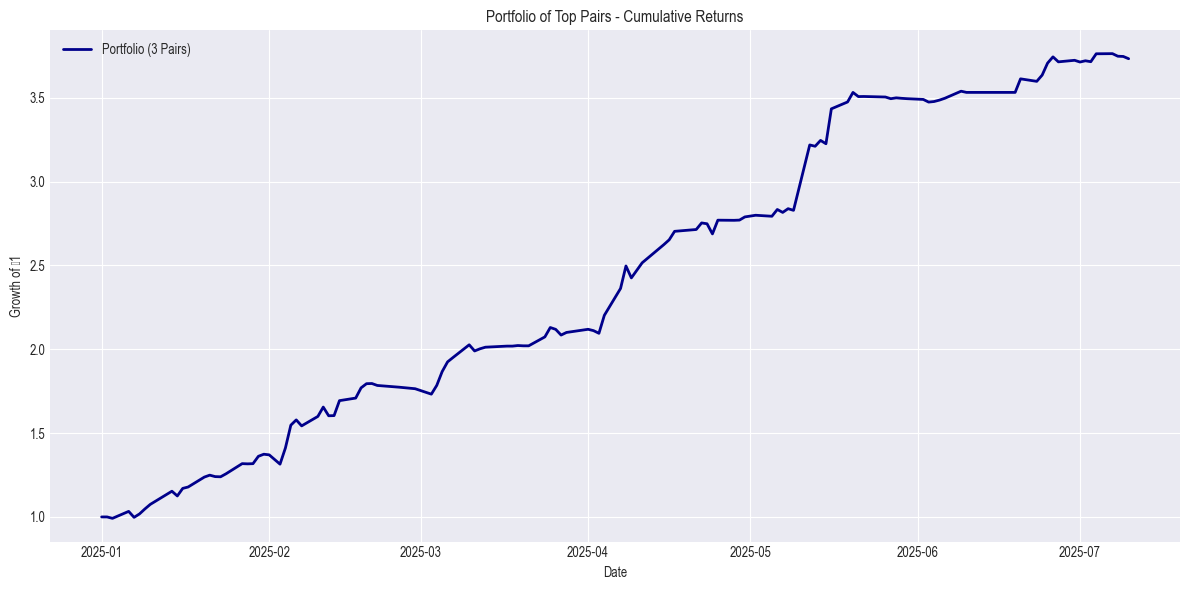


Portfolio Performance Metrics:
Total Return: 273.23%
Annualized Return: 1159.77%
Annualized Volatility: 39.30%
Sharpe Ratio: 29.51
Max Drawdown: -4.31%

Comparison:
Best Individual Pair Sharpe: 29.61
Portfolio Sharpe: 29.51
Diversification Benefit: -0.10


In [56]:
# Section 10: Portfolio of Top Pairs (Optional)
if len(valid_pairs) > 0:
    # Create portfolio of top N pairs
    top_n = min(3, len(backtest_df))  # Top 3 pairs or fewer if less available
    portfolio_pairs = backtest_df.head(top_n)
    
    print(f"Creating portfolio of top {top_n} pairs...")
    
    # Equal weight allocation
    weight_per_pair = 1.0 / top_n
    portfolio_returns = pd.DataFrame(index=df_prices.index)
    portfolio_returns['portfolio_return'] = 0.0
    
    for idx, row in portfolio_pairs.iterrows():
        stock_a = row['Stock_A']
        stock_b = row['Stock_B']
        hedge_ratio = row['Hedge_Ratio']
        
        # Get pair returns
        signals, returns = backtest_pair(stock_a, stock_b, hedge_ratio, df_prices)
        
        # Add to portfolio with equal weight
        portfolio_returns['portfolio_return'] += weight_per_pair * returns['strategy_return']
    
    # Rename column to match expected input for performance function
    portfolio_returns['strategy_return'] = portfolio_returns['portfolio_return']
    
    # Calculate portfolio cumulative returns
    portfolio_returns['cumulative'] = (1 + portfolio_returns['strategy_return']).cumprod()
    
    # Portfolio performance metrics
    portfolio_metrics = calculate_performance_metrics(portfolio_returns)
    
    # Plot portfolio performance
    plt.figure(figsize=(12, 6))
    plt.plot(portfolio_returns.index, portfolio_returns['cumulative'], 
             label=f'Portfolio ({top_n} Pairs)', color='darkblue', linewidth=2)
    plt.title('Portfolio of Top Pairs - Cumulative Returns')
    plt.xlabel('Date')
    plt.ylabel('Growth of ₹1')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    # Print portfolio metrics
    print(f"\nPortfolio Performance Metrics:")
    print(f"Total Return: {portfolio_metrics['Total_Return']*100:.2f}%")
    print(f"Annualized Return: {portfolio_metrics['Annualized_Return']*100:.2f}%")
    print(f"Annualized Volatility: {portfolio_metrics['Annualized_Volatility']*100:.2f}%")
    print(f"Sharpe Ratio: {portfolio_metrics['Sharpe_Ratio']:.2f}")
    print(f"Max Drawdown: {portfolio_metrics['Max_Drawdown']*100:.2f}%")
    
    # Compare individual vs portfolio
    print(f"\nComparison:")
    print(f"Best Individual Pair Sharpe: {backtest_df['Sharpe_Ratio'].max():.2f}")
    print(f"Portfolio Sharpe: {portfolio_metrics['Sharpe_Ratio']:.2f}")
    print(f"Diversification Benefit: {portfolio_metrics['Sharpe_Ratio'] - backtest_df['Sharpe_Ratio'].max():.2f}")
    
    # Save portfolio results
    portfolio_summary = pd.DataFrame([portfolio_metrics])
    portfolio_summary.to_csv('portfolio_performance.csv', index=False)

else:
    print("No valid pairs available for portfolio construction!")


In [57]:
def backtest_pair_with_investment(stock_a, stock_b, hedge_ratio, df_prices, initial_capital=100000, entry_threshold=1.0, exit_threshold=0.05):
    """Backtest a pair trading strategy with investment tracking"""
    # Get price series
    y = df_prices[stock_a]
    x = df_prices[stock_b]
    
    # Calculate spread and z-score
    spread = y - hedge_ratio * x
    zscore = (spread - spread.mean()) / spread.std()
    
    # Generate signals
    signals = pd.DataFrame(index=df_prices.index)
    signals['zscore'] = zscore
    signals['position'] = 0
    
    for i in range(1, len(signals)):
        if signals['zscore'].iloc[i] > entry_threshold:
            signals.iloc[i, signals.columns.get_loc('position')] = -1  # Short spread
        elif signals['zscore'].iloc[i] < -entry_threshold:
            signals.iloc[i, signals.columns.get_loc('position')] = 1   # Long spread
        elif abs(signals['zscore'].iloc[i]) < exit_threshold:
            signals.iloc[i, signals.columns.get_loc('position')] = 0   # Exit
        else:
            signals.iloc[i, signals.columns.get_loc('position')] = signals.iloc[i-1, signals.columns.get_loc('position')]
    
    # Calculate daily returns
    returns = pd.DataFrame(index=signals.index)
    returns[stock_a] = df_prices[stock_a].pct_change()
    returns[stock_b] = df_prices[stock_b].pct_change()
    returns['strategy_return'] = 0.0
    
    for i in range(1, len(returns)):
        pos = signals['position'].iloc[i-1]
        ret_a = returns[stock_a].iloc[i]
        ret_b = returns[stock_b].iloc[i]
        
        if pos == 1:  # Long spread
            returns['strategy_return'].iloc[i] = ret_a - hedge_ratio * ret_b
        elif pos == -1:  # Short spread
            returns['strategy_return'].iloc[i] = -ret_a + hedge_ratio * ret_b
    
    # Capital tracking
    returns['strategy_growth'] = (1 + returns['strategy_return']).cumprod()
    returns['investment_value'] = initial_capital * returns['strategy_growth']
    
    final_value = returns['investment_value'].iloc[-1]
    profit = final_value - initial_capital
    
    print(f"\nInvestment Summary for {stock_a} - {stock_b}:")
    print(f"Initial Capital: ₹{initial_capital:,.2f}")
    print(f"Final Value: ₹{final_value:,.2f}")
    print(f"Total Profit: ₹{profit:,.2f}")
    print(f"ROI: {profit / initial_capital * 100:.2f}%")
    
    return signals, returns


In [58]:
best_pair = backtest_df.iloc[0]
signals, returns = backtest_pair_with_investment(
    stock_a=best_pair['Stock_A'],
    stock_b=best_pair['Stock_B'],
    hedge_ratio=best_pair['Hedge_Ratio'],
    df_prices=df_prices,
    initial_capital=100000
)


Investment Summary for DATAMATICS.NS - HCLTECH.NS:
Initial Capital: ₹100,000.00
Final Value: ₹387,140.01
Total Profit: ₹287,140.01
ROI: 287.14%
